<h1>Data Preprocessing - 03 - Feature Engineering and Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = './Sepsis_Imputed.csv'
df = pd.read_csv(file)
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,Phosphate,Potassium,Bilirubin_total,Hct,PTT,WBC,Platelets,Age,Gender,SepsisLabel
0,77.0,1.000,36.886808,97.0,26.5,68.0,21.00,-3.000000,22.000000,1.0,...,3.7,4.8,0.9,0.422,27.2,17.7,158.0,59.28,1.0,0.0
1,71.5,0.975,36.542059,97.0,83.5,68.0,16.50,-3.000000,22.000000,1.0,...,3.7,4.8,0.9,0.422,27.2,17.7,158.0,59.28,1.0,0.0
2,79.0,1.000,36.653835,106.0,87.0,72.0,20.75,-3.000000,22.000000,1.0,...,3.6,4.8,0.9,0.422,27.2,17.7,138.0,59.28,1.0,0.0
3,61.0,1.000,36.730339,151.0,95.0,90.0,16.00,-3.000000,23.000000,0.6,...,3.6,3.4,0.9,0.396,27.2,13.0,138.0,59.28,1.0,0.0
4,49.0,1.000,36.736256,145.0,92.0,84.0,20.00,-1.000000,23.000000,0.6,...,3.6,3.4,0.9,0.396,27.2,13.0,138.0,59.28,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172405,54.5,0.985,37.200000,104.5,74.0,55.0,1.00,1.162219,25.326791,0.5,...,3.4,4.6,0.8,0.428,52.9,20.3,181.0,66.00,1.0,1.0
172406,54.0,0.960,37.200000,112.0,74.0,52.0,1.00,1.076861,25.324855,0.5,...,3.4,4.6,0.8,0.428,52.9,20.3,181.0,66.00,1.0,1.0
172407,67.5,0.965,37.200000,118.0,77.0,55.0,1.00,1.060464,25.328213,0.5,...,3.4,4.6,0.8,0.428,52.9,20.3,181.0,66.00,1.0,1.0
172408,67.0,0.960,37.200000,115.5,76.0,55.5,1.00,1.023737,25.396821,0.5,...,3.4,4.6,0.8,0.428,52.9,20.3,181.0,66.00,1.0,1.0


In [3]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'Hct', 'PTT', 'WBC',
       'Platelets', 'Age', 'Gender', 'SepsisLabel'],
      dtype='object')

<h3>Feature Generation

Shock index (SI) is defined as the heart rate (HR) divided by systolic blood pressure (SBP).

The qSOFA score is a simple score consisting of three items: respiratory rate (RR) ≥ 22 breaths per minute, altered mentation (Glasgow Coma Scale [GCS] < 15), and systolic blood pressure (SBP) < 100 mmHg.

In [4]:
df['ShockIndex']=df.HR/df.SBP
df['qSOFA']=np.where(df.Resp>=22,1,0) + np.where(df.SBP<100,1,0)

In [5]:
X=df.drop(columns=['SepsisLabel'])
y=df['SepsisLabel']

<h3>Feature Selection

<b>Variance Threshold:</b> To remove columns with almost constant values

In [6]:
from sklearn.feature_selection import VarianceThreshold
v_threshold=VarianceThreshold(threshold=0.01)
v_threshold.fit(X)
cols_var=v_threshold.get_support()

In [7]:
X.columns[~cols_var]

Index(['O2Sat', 'pH', 'SaO2', 'Hct'], dtype='object')

In [8]:
df=df.drop(columns=['O2Sat', 'pH', 'SaO2', 'Hct'])

<h3>Scaling features based on distribution

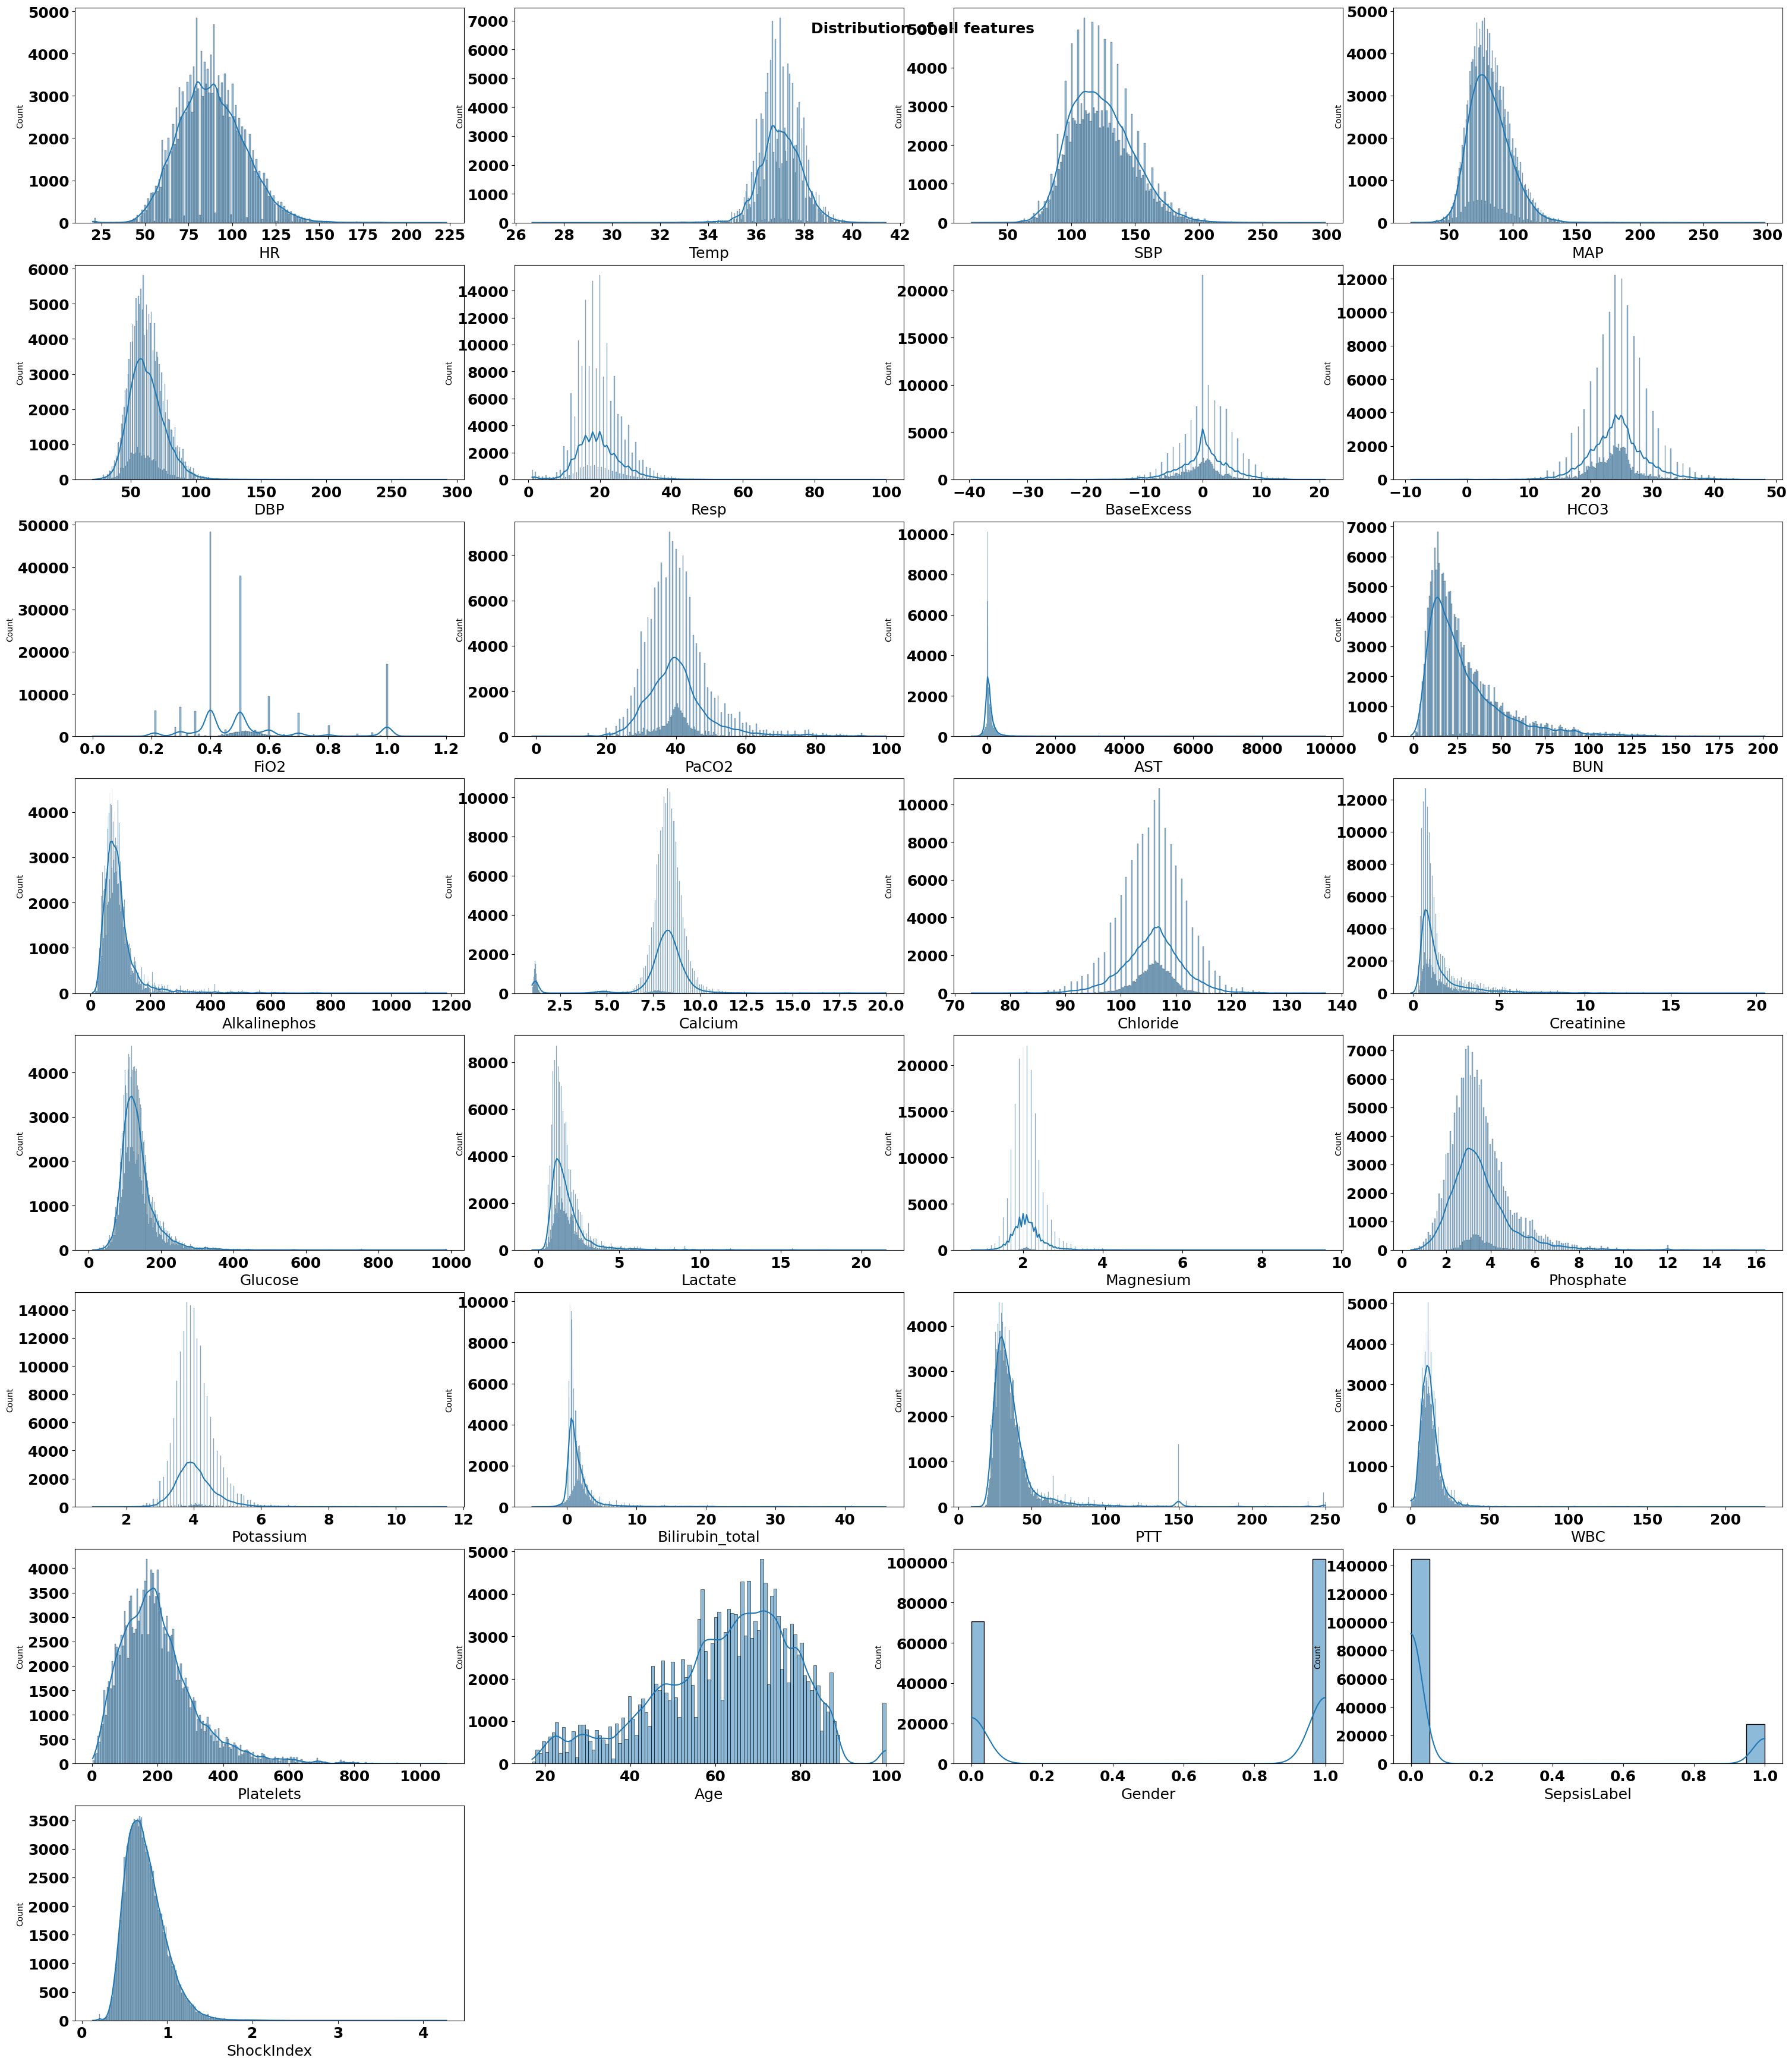

In [9]:
columnnames=df.columns[:-1].tolist()
rows,cols=8,4
fig, axes = plt.subplots(rows,cols, figsize=(30, 35))
plt.tight_layout(pad=3.0)

i=0
for row in range(rows):
    for col in range(cols):
        plt.subplot(rows,cols,i+1)
        sns.histplot(x=df[columnnames[i]],kde=True)
        plt.suptitle('Distribution of all features',weight = 'bold', fontsize=18)
        plt.xticks(weight = 'bold', fontsize=18)
        plt.yticks(weight = 'bold', fontsize=18)
        plt.xlabel(columnnames[i], fontsize=18)        
        if i==(len(columnnames)-1):
            break
        else:
            i=i+1
N = len(columnnames)            
for ax in axes.flat[N:]:
    ax.remove()

<li><b>MinMax</b> scaler for skewed data.
<li><b>Standard</b> scaler for columns following normal distribution.

In [10]:
MinMax=['AST', 'BUN','Alkalinephos', 'FiO2','Creatinine','Lactate','Bilirubin_total','PTT', 'Age']
standard_cols=['HR',  'Temp',  'Resp', 'SBP', 'MAP','DBP',
       'BaseExcess', 'HCO3',   'PaCO2',  'Calcium', 'Chloride', 'Glucose',
        'Magnesium', 'Phosphate', 'Potassium', 
         'WBC', 'Platelets']

Will be scaled after Train-test split

In [11]:
df.to_csv('Sepsis_for_model.csv',index=False)